# Institutional Dimension

In [ ]:
import pandas as pd
import os
import sys, importlib
sys.path.append(r"\02-Function")
import Function_use
importlib.reload(Function_use)

📊 1. Worldwide Governance Indicators (WGI) – Banque mondiale
    Source : https://info.worldbank.org/governance/wgi/

📊 2. Corruption Perceptions Index (CPI) – Transparency International
    Source : https://www.transparency.org/en/cpi

📊 3. Freedom in the World – Freedom House: Deux indices principaux :
    Source : https://freedomhouse.org/report/freedom-world

📊 4. Varieties of Democracy (V-Dem) – Université de Göteborg : Base gratuite, très détaillée (350+ indicateurs).
    Source : https://www.v-dem.net/

📊 5. Heritage Foundation – Index of Economic Freedom
    Source : https://www.heritage.org/index/

📊 6. Polity5 – Systemic Peace : Mesure de la démocratie et de l’autocratie (−10 à +10).
    Source : https://www.systemicpeace.org/polityproject.html

📊 7. Doing Business (Banque mondiale, jusqu’en 2021) Mesurait :
    Source : https://archive.doingbusiness.org/en/doingbusiness

## 1- WGI

### Import Data

In [ ]:
# Import data
file_path = "01-Data/01-WGI.xlsx"
df_wgi = reshape_government_data(file_path)

In [ ]:
# Preprocessing
var_cols_wgi = ["gov_eff", "con_corr", "pol_sta", "reg_qual", "rul_law", "voi_acc"]
# Use RobustScaler
df_imputed_wgi, X_scaled_wgi = preprocess_data(df_wgi, var_cols_wgi, scaler_type='robust')

c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\market_analysis\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [12]:
selected_countries = [
    "Algeria"	, "Angola"	, "Bahrain"	, "Botswana"	, "Burkina Faso"	, "Cameroon"	, 
    "Chad"	, "Congo, Dem. Rep."	, "Djibouti"	, "Egypt, Arab Rep."	, "Ethiopia"	, 
    "France"	, "Gabon"	, "Gambia, The"	, "Ghana"	, "Guinea"	, "Guinea-Bissau"	, 
    "Zimbabwe"	, "Jordan"	, "Kenya"	, "Madagascar"	, "Malawi"	, "	Maldives"	, 
    "Mauritania"	, "Mozambique"	, "	Namibia	"	, "	Nepal"	, "Nigeria"	, "	Oman"	, 
    "Pakistan"	, "	Qatar	"	, "	Congo, Rep.	"	, "	Romania"	, "Senegal"	, "	Seychelles"	, 
    "South Sudan"	, "Sri Lanka"	, "Sudan"	, "Tunisia"	, "Uganda"	, "Viet Nam"	, 
    "Yemen, Rep."	, "Zambia",
    "United Arab Emirates" , "France" , "Cote d'Ivoire" , "Cyprus" , "Czechia" , 
    "Dominican Republic" , "Ghana" , "Iraq" , "Jordan" , "Kuwait" , "Lebanon" , 
    "Libya" , "Morocco" , "Mauritius" , "Romania" , "Saudi Arabia" , "Sudan" , 
    "Serbia" , "Syrian Arab Republic" , "Tanzania" , "Turkiye"
]

### PCA Analysis

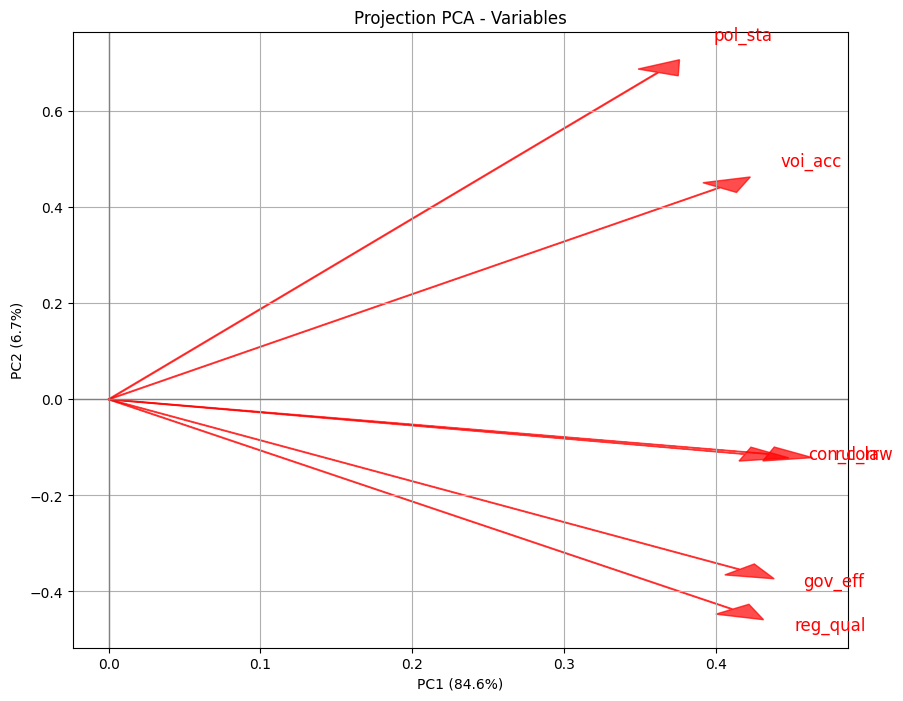

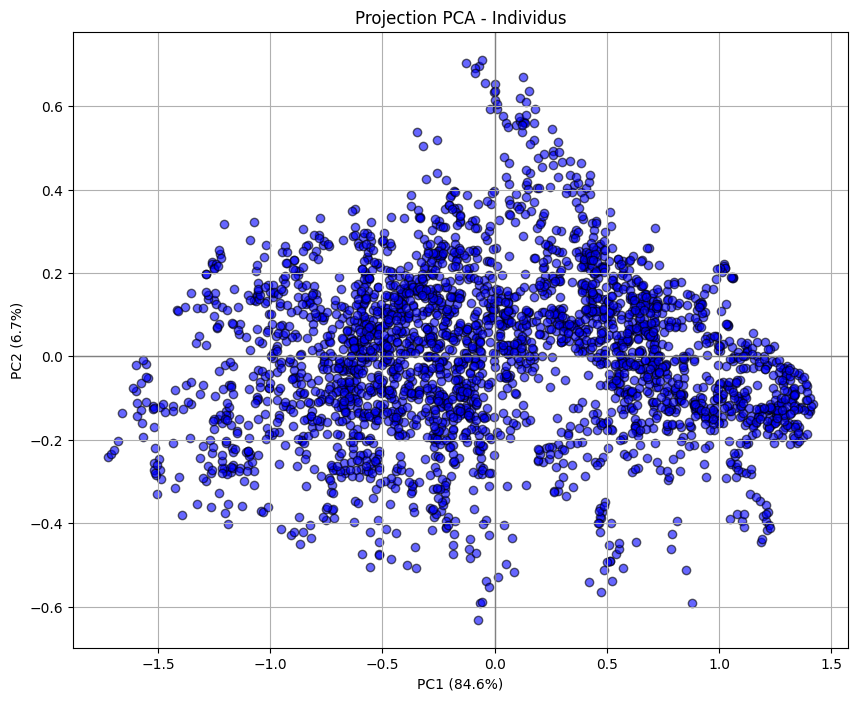

In [ ]:
# PCA and weight 
weights_wgi, explained_var_wgi, cum_var_wgi, pca_full_wgi = compute_pca_weights(X_scaled_wgi, var_cols_wgi)

# Variabls cards
pca_plot(X_scaled_wgi, var_cols_wgi, pca_full_wgi, ax1=1, ax2=2,
         plot_type="variables", save_path="03- Output/carte_variables.png")

# Individual cards
pca_plot(X_scaled_wgi, var_cols_wgi, pca_full_wgi, ax1=1, ax2=2,
         plot_type="individus", save_path="03- Output/carte_individus.png")


C:\Users\RMG_AMMOURI\AppData\Local\Temp\ipykernel_29616\328412225.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_clusters)


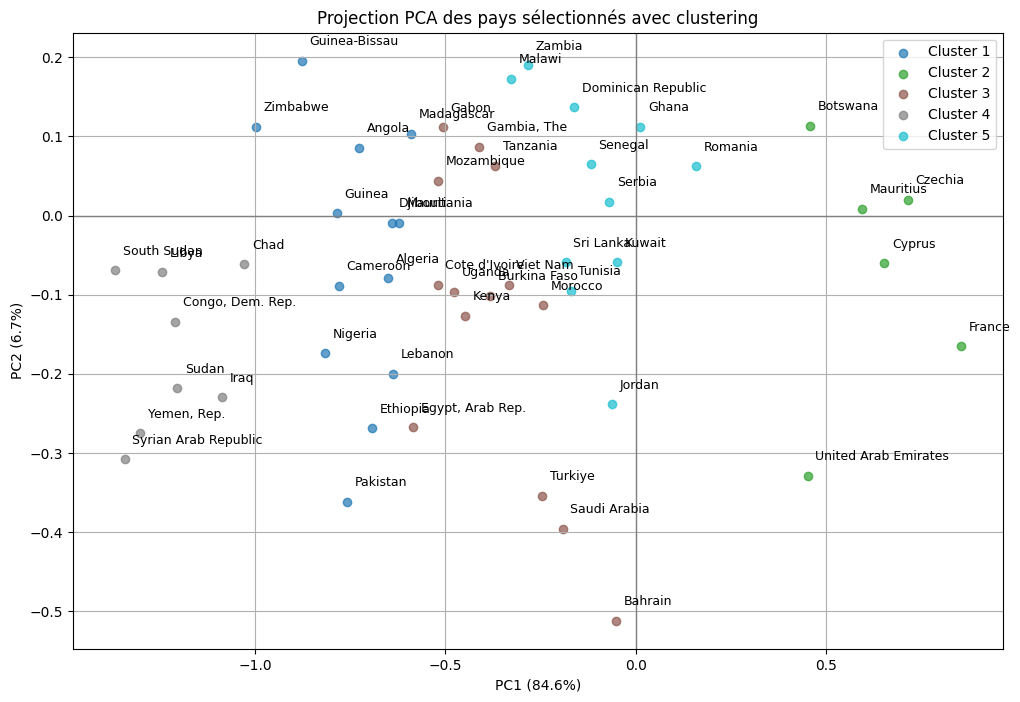

In [ ]:

pca_individus_clusters(X_scaled_wgi, df_imputed_wgi, pca_full_wgi, selected_countries, 
                       n_clusters=5, 
                       save_path="03- Output/carte_individus_cluster_5.png")


### Score WGI

✅ Résultats exportés : 05-Results/04-institu_dim/stability_government_scores.csv
✅ Figure sauvegardée : 05-Results/04-institu_dim/stability_government_example.png


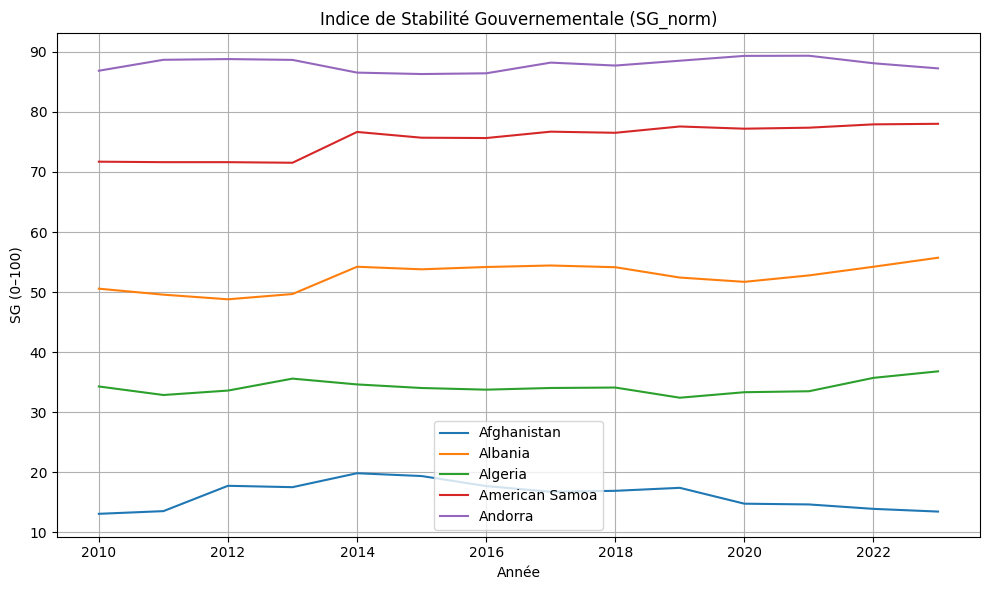

In [ ]:
Score_wgi = compute_government_stability(
    df=df_imputed_wgi,
    X_scaled=X_scaled_wgi,
    weights=weights_wgi,
    csv_path="03- Output/stability_government_scores.csv",
    img_path="03- Output/stability_government_example.png"
)

In [ ]:
df_indice_wgi = construire_indice_synthetique(X_scaled_wgi, df_imputed_wgi, pca_full_wgi, method="pc1")

# Yearly indeces by countries 
df_indice_annuel_wgi = df_indice_wgi[["Country", "Year", "Indice_Instit"]]

## 2- WB

### Import Data

In [ ]:
# Import data
file_path = "01-Data/05-WB.xlsx"
df_wb = pd.read_excel(file_path, sheet_name="Data_use")

In [ ]:
var_cols_wb = ["doi_bus", "star_bus", "cons_per", "regi_pro", "gett_cre", "reco_reg", 
               "reco_bur", "prot_inv", "payi_tax", "reco_tot", "enfo_con", "reco_cos", 
               "reco_res", "reco_rec", "reco_str"]


# Use StandardScaler
df_imputed_wb, X_scaled_wb = preprocess_data(df_wb, var_cols_wb, scaler_type='standard')

c:\Users\RMG_AMMOURI\AppData\Local\anaconda3\envs\market_analysis\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


### PCA Analysis

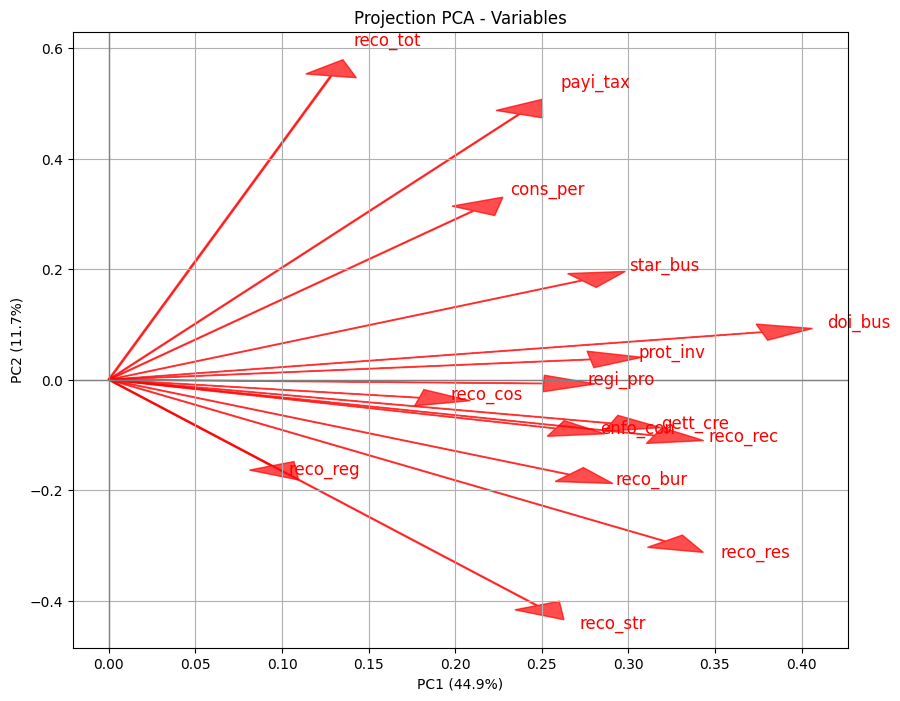

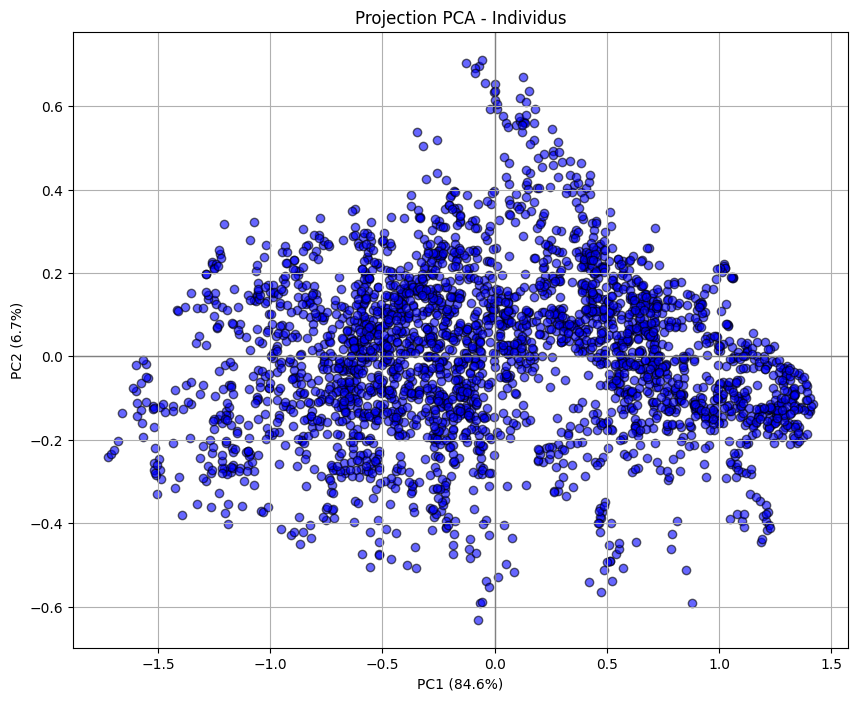

In [ ]:
# PCA and weight
weights_wb, explained_var_wb, cum_var_wb, pca_full_wb = compute_pca_weights(X_scaled_wb, var_cols_wb)

# Variables cards
pca_plot(X_scaled_wb, var_cols_wb, pca_full_wb, ax1=1, ax2=2,
         plot_type="variables", save_path="03- Output/carte_variables_wb.png")

# Individuals cards
pca_plot(X_scaled_wgi, var_cols_wgi, pca_full_wgi, ax1=1, ax2=2,
         plot_type="individus", save_path="03- Output/carte_individus_wb.png")


C:\Users\RMG_AMMOURI\AppData\Local\Temp\ipykernel_29616\328412225.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", n_clusters)


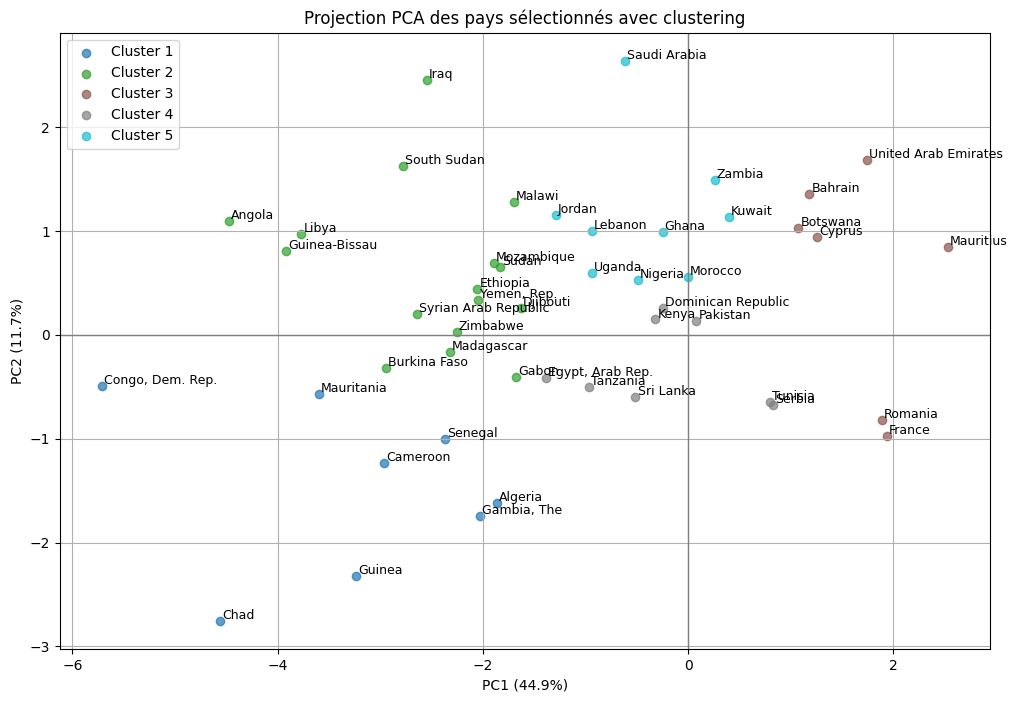

In [ ]:
pca_individus_clusters(X_scaled_wb, df_imputed_wb, pca_full_wb, selected_countries, 
                       n_clusters=5, 
                       save_path="03- Output/carte_individus_cluster_5_wb.png")


### Score WGI

✅ Résultats exportés : 05-Results/04-institu_dim/stability_wb_scores.csv
✅ Figure sauvegardée : 05-Results/04-institu_dim/stability_wb_example.png


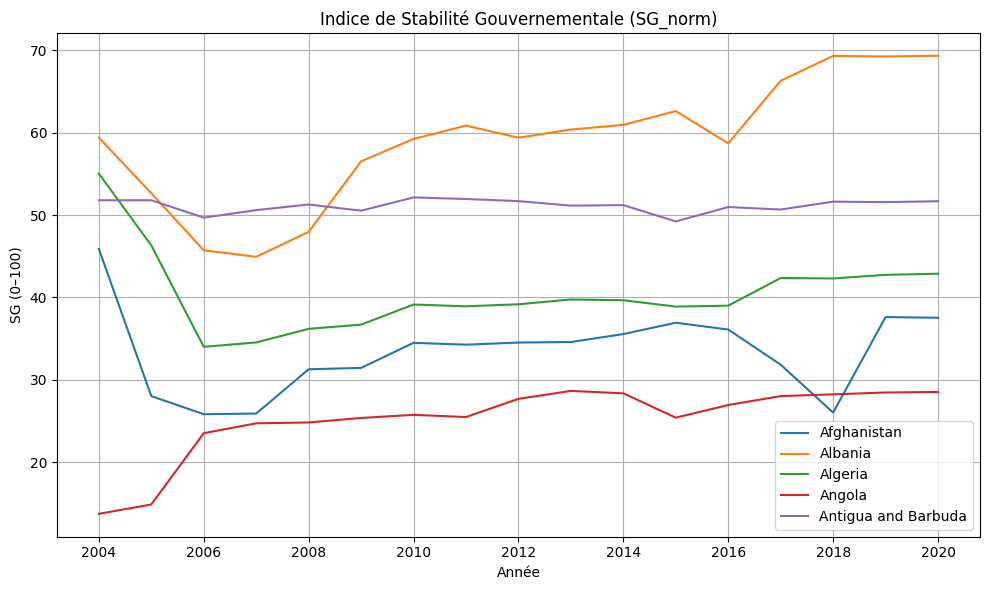

In [ ]:
Score_wb = compute_doing_business(
    df=df_imputed_wb,
    X_scaled=X_scaled_wb,
    weights=weights_wb,
    csv_path="03- Output/stability_wb_scores.csv",
    img_path="03- Output/stability_wb_example.png"
)

In [ ]:
df_indice_wb = construire_indice_synthetique(X_scaled_wb, df_imputed_wb, pca_full_wb, method="pc1")

# Yearly indeces by countries
df_indice_annuel_wb = df_indice_wb[["Country", "Year", "Indice_Instit"]]

## 3- Institutional Score

### Data processing

In [ ]:

# Import data
file_path = "03- Output/stability_government_scores.csv"
Score_wgi = pd.read_csv(file_path, delimiter=",")

file_path = "03- Output/stability_wb_scores.csv"
Score_wb = pd.read_csv(file_path, delimiter=",")

file_path = "01-Data/02-CPI.xlsx"
Score_cpi = pd.read_excel(file_path, sheet_name="Data_use")

file_path = "01-Data/04-IEF.csv"
Score_ief = pd.read_csv(file_path, delimiter=";")

file_path = "01-Data/03-FH.xlsx"
Score_fh = pd.read_excel(file_path, sheet_name="Data_use")

# Rename Score column
Score_wgi = Score_wgi.rename(columns={"SG_norm": "score_wgi"})
Score_wgi = Score_wgi[["Country", "Year", "score_wgi"]]
Score_wb = Score_wb.rename(columns={"SG_norm": "score_wb"})
Score_wb = Score_wb[["Country", "Year", "score_wb"]]
Score_cpi = Score_cpi.rename(columns={"score": "score_cpi", 
                                      "country": "Country",
                                      "years": "Year"})
Score_cpi = Score_cpi[["Country", "Year", "score_cpi"]]
Score_fh = Score_fh.rename(columns={"FH": "score_fh",
                                    "Years": "Year"})
Score_fh = Score_fh[["Country", "Year", "score_fh"]]
Score_ief = Score_ief.rename(columns={"IEF": "score_ief"})
Score_ief = Score_ief[["Country", "Year", "score_ief"]]

In [ ]:
# Merge 5 sources by Countries x Year
df_dim_insdtitu = Score_wb.merge(Score_cpi, on=["Country", "Year"], how="outer") \
                .merge(Score_fh, on=["Country", "Year"], how="outer") \
                .merge(Score_ief, on=["Country", "Year"], how="outer") \
                .merge(Score_wgi, on=["Country", "Year"], how="outer")

In [ ]:
# Dataframe filter
df_dim_insdtitu_filtered = df_dim_insdtitu[df_dim_insdtitu["Country"].isin(selected_countries)]
selected_year=[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
df_dim_insdtitu_filtered = df_dim_insdtitu_filtered[df_dim_insdtitu_filtered["Year"].isin(selected_year)]

### Score Analysis

#### a- Global Score

In [ ]:
# 1. Initial processing (interpolation / mean / median)
df_clean = handle_missing_values(df_dim_insdtitu_filtered, method="mean")

In [ ]:
# 2. Compute hybrid global score

weights_expert = {"score_wb": 0.1, "score_cpi": 0.1, "score_fh": 0.1, "score_ief": 0.2, "score_wgi": 0.5}

df_global, w_stat, w_exp, w_hybrid = compute_global_score_hybrid(
    df_clean,
    method_stat="pca",
    weights_expert=weights_expert,
    alpha=0.6
)
save_to_excel(df_global, "03- Output/global_scores.xlsx")

✅ DataFrame saved successfully to: 05-Results/04-institu_dim/global_scores.xlsx


#### b- Expo & Vuln Index

In [ ]:
# Import Data
folder_path = "01-Data"
df_vul = pd.read_excel(os.path.join(folder_path, "00- WDI.xlsx"))

# "Melt" transform long format 
df_long = df_vul.melt(id_vars=["Country Name", "Series Name"], 
                  var_name="Year", value_name="Value")

# Pivot for column series 
df_final_vul = df_long.pivot_table(index=["Country Name", "Year"], 
                               columns="Series Name", 
                               values="Value").reset_index()

# Rename column 
df_final_vul.columns.name = None
df_final_vul = df_final_vul.rename(columns={"Country Name": "Country"})
# Filter dataframe 
df_final_vul = df_final_vul[df_final_vul["Country"].isin(selected_countries)]

In [ ]:
# Merge 5 sources by Countries x Year
score_glob_institu = df_global.merge(df_final_vul, on=["Country", "Year"], how="outer")
save_to_excel(score_glob_institu, "03- Output/score_glob_institu.xlsx")

✅ DataFrame saved successfully to: 05-Results/04-institu_dim/score_glob_institu.xlsx


In [57]:
score_glob_institu['test'] = 1 - score_glob_institu['Insurance_expo']
score_glob_institu.head(1)

,Country,Year,score_wb,score_cpi,score_fh,score_ief,score_wgi,score_global,GDP,Insurance_expo,test
0,Algeria,2010,39.131208,2.9,36.0,56.9,34.260437,0.32918,4456.610274,8.609013,-7.609013


In [ ]:
df_res = compute_panel_institutional_risk(score_glob_institu,
                                           score_cols=['score_wb','score_cpi','score_fh','score_ief','score_wgi'],
                                           expo_column='GDP',
                                           vuln_method='composite',
                                           indicator_weights={'score_wgi':0.4,'score_cpi':0.3,'score_fh':0.3},
                                           gamma=(0.5,0.3,0.2),
                                           kappa=(1.0,0.5),
                                           cat_weights={'score_wb':0.1,'score_cpi':0.1,'score_fh':0.1,'score_ief':0.2,'score_wgi':0.5},  # None or { 'R_score_wb':0.2, ... }
                                           classify_method='jenks',
                                           n_classes=3)


✅ DataFrame saved successfully to: 05-Results/04-institu_dim/Imp_Prob_institu.xlsx


In [73]:
selected_countries = [
    'Algeria', 'Angola', 'Bahrain', 'Botswana', 'Burkina Faso',
       'Cameroon', 'Chad', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Cyprus',
       'Czechia', 'Djibouti', 'Dominican Republic', 'Egypt, Arab Rep.',
       'Ethiopia', 'France', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea',
       'Guinea-Bissau', 'Iraq', 'Jordan', 'Kenya', 'Kuwait', 'Lebanon',
       'Libya', 'Madagascar', 'Malawi', 'Mauritania', 'Mauritius',
       'Morocco', 'Mozambique', 'Nigeria', 'Pakistan', 'Romania',
       'Saudi Arabia', 'Senegal', 'Serbia', 'South Sudan', 'Sri Lanka',
       'Sudan', 'Syrian Arab Republic', 'Tanzania', 'Tunisia', 'Turkiye',
       'Uganda', 'United Arab Emirates', 'Viet Nam', 'Yemen, Rep.',
       'Zambia', 'Zimbabwe'
]

group_dict = {
    "Afrique Australe": ["Angola","Botswana","Malawi","Mozambique","Zambia","Zimbabwe", "Mauritius"],
    "Afrique Centrale": ["Cameroon","Congo, Dem. Rep.","Gabon", "Chad"],
    "Afrique de l'Ouest": ["Burkina Faso","Gambia The","Ghana","Guinea","Guinea-Bissau", "Nigeria", "Senegal", "Cote d'Ivoire"],
    "Afrique du Nord": ["Algeria","Egypt, Arab Rep.","Mauritania","South Sudan","Sudan","Tunisia", "Libya", "Morocco"],
    "Asie": ["Pakistan","Sri Lanka","Viet Nam"],
    "Corne de l'Afrique": ["Djibouti","Ethiopia","Madagascar", "Kenya", "Uganda", "Tanzania"],
    "Europe": ["France","Romania","Turkiye", "Cyprus", "Czechia", "Serbia", "Dominican Republic"],
    "Moyen-Orient": ["Bahrain","Jordan", "Yemen, Rep.", "United Arab Emirates", "Iraq", "Kuwait", "Lebanon", "Saudi Arabia", "Syrian Arab Republic"],
}

In [ ]:
# Cleaning
df_res["Country"] = df_res["Country"].str.strip()

# Filter
df_res = df_res[df_res["Country"].isin(selected_countries)]

# Maping Groups x Countries
country_to_group = {country: group for group, countries in group_dict.items() for country in countries}

# Add "Groupe"
df_res["Groupe"] = df_res["Country"].map(country_to_group)
cols = ["Groupe"] + [col for col in df_res.columns if col != "Groupe"]
df_res = df_res[cols]

In [ ]:
save_to_excel(df_res, "03- Output/Imp_Prob_institu.xlsx")

✅ DataFrame saved successfully to: 05-Results/04-institu_dim/Imp_Prob_institu.xlsx


### Risk Matrices

In [ ]:
# Import Data
folder_path = "03- Output"
df_res = pd.read_excel(os.path.join(folder_path, "Imp_Prob_institu.xlsx"))
#group_dict = {
 #   "Afrique Australe": ["Angola","Botswana","Malawi","Mozambique","Namibia","Zambia","Zimbabwe", "Mauritius"],
 #   "Afrique Centrale": ["Cameroon","Congo Dem Rep","Congo Rep","Gabon", "Chad"],
 #   "Afrique de l'Ouest": ["Burkina Faso","Gambia The","Ghana","Guinea","Guinea-Bissau", "Nigeria", "Senegal", "Cote d'Ivoire"],
 #   "Afrique du Nord": ["Algeria","Egypt Arab Rep","Mauritania","South Sudan","Sudan","Tunisia", "Libya", "Morocco"],
 #   "Asie": ["Maldives","Nepal","Pakistan","Sri Lanka","Viet Nam"],
 #   "Corne de l'Afrique": ["Djibouti","Ethiopia","Madagascar","Seychelles", "Kenya", "Uganda", "Tanzania"],
 #   "Europe": ["France","Romania","Turkiye", "Cyprus", "Czechia", "Serbia", "Dominican Republic"],
 #   "Moyen-Orient": ["Bahrain","Jordan","Oman","Qatar","Yemen, Rep.", "United Arab Emirates", "Iraq", "Kuwait", "Lebanon", "Saudi Arabia", "Syrian Arab Republic"],
#}

#### Countries

##### Dynamic Matrix

✅ Animation sauvegardée pour le groupe 'Afrique Australe': 05-Results/04-institu_dim/animations_countries\Afrique_Australe_institutional_risk.gif


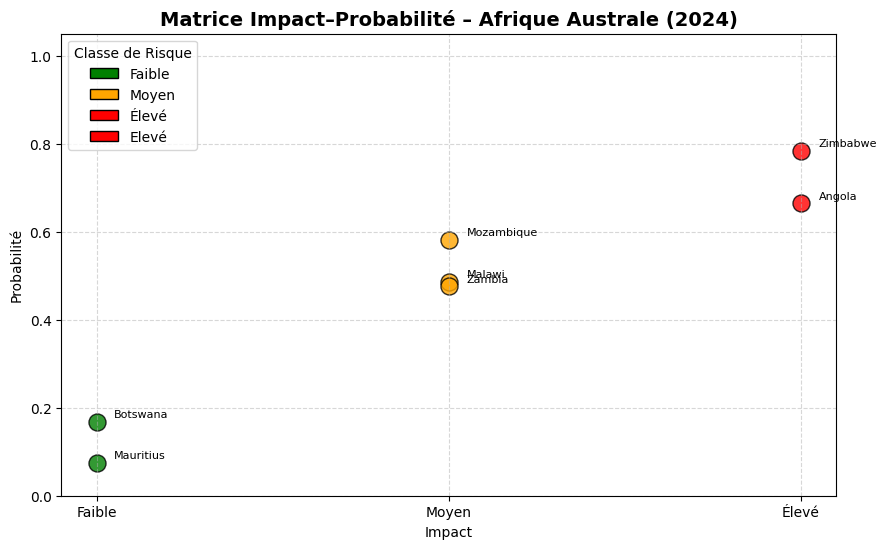

✅ Animation sauvegardée pour le groupe 'Afrique Centrale': 05-Results/04-institu_dim/animations_countries\Afrique_Centrale_institutional_risk.gif
✅ Animation sauvegardée pour le groupe 'Afrique de l'Ouest': 05-Results/04-institu_dim/animations_countries\Afrique_de_l'Ouest_institutional_risk.gif
✅ Animation sauvegardée pour le groupe 'Afrique du Nord': 05-Results/04-institu_dim/animations_countries\Afrique_du_Nord_institutional_risk.gif
✅ Animation sauvegardée pour le groupe 'Asie': 05-Results/04-institu_dim/animations_countries\Asie_institutional_risk.gif
✅ Animation sauvegardée pour le groupe 'Corne de l'Afrique': 05-Results/04-institu_dim/animations_countries\Corne_de_l'Afrique_institutional_risk.gif
✅ Animation sauvegardée pour le groupe 'Europe': 05-Results/04-institu_dim/animations_countries\Europe_institutional_risk.gif
✅ Animation sauvegardée pour le groupe 'Moyen-Orient': 05-Results/04-institu_dim/animations_countries\Moyen-Orient_institutional_risk.gif


In [ ]:
# Per Groups, for coutries
animate_institutional_risk_matrices(
    df_res,
    group_dict=group_dict,
    save_folder="03- Output/animations_countries",
    years_to_plot=[2010, 2015, 2020, 2024],
    interval=1200,
    max_show=1,
    prob_col="SRI"
)

##### Static Matrix

✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Afrique_Australe_2024.png


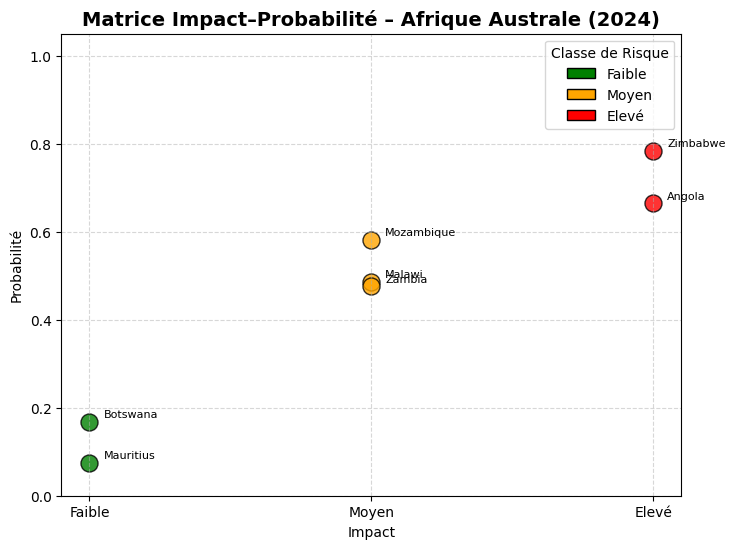

✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Afrique_Centrale_2024.png
✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Afrique_de_l'Ouest_2024.png
✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Afrique_du_Nord_2024.png
✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Asie_2024.png
✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Corne_de_l'Afrique_2024.png
✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Europe_2024.png
✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices 24\risk_matrix_Moyen-Orient_2024.png


In [ ]:
# Per Year, countries
plot_institutional_risk_matrices(df_res, group_dict, year=2024, 
                                 max_show=1,
                                 save_path="03- Output/risk_matrices 24")

#### Groups

##### Static Matrix

✅ Figure sauvegardée : 05-Results/04-institu_dim/risk_matrices g 24\group_risk_matrix_2024.png


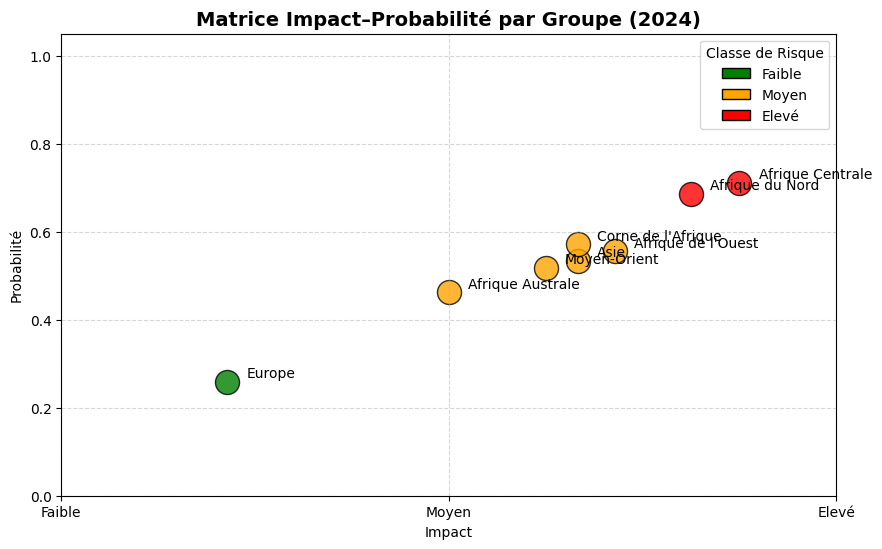

In [ ]:
plot_institutional_risk_matrices_group(df_res, group_dict, year=2024, agg_func='mean', 
                       save_path="03- Output/risk_matrices g 24")

##### Dynamic Matrix

✅ Animation sauvegardée pour le groupe 'Afrique Australe': 05-Results/04-institu_dim/animations_groups\Afrique_Australe_group_risk.gif


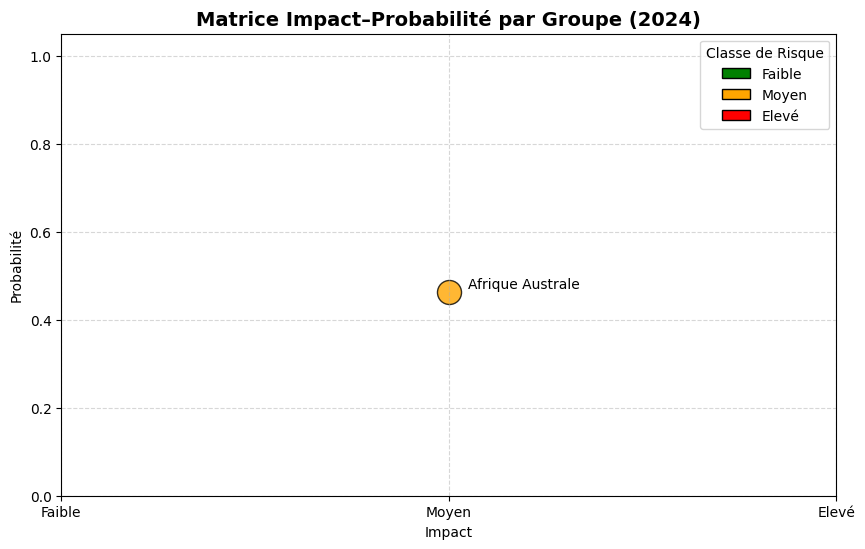

✅ Animation sauvegardée pour le groupe 'Afrique Centrale': 05-Results/04-institu_dim/animations_groups\Afrique_Centrale_group_risk.gif
✅ Animation sauvegardée pour le groupe 'Afrique de l'Ouest': 05-Results/04-institu_dim/animations_groups\Afrique_de_l'Ouest_group_risk.gif
✅ Animation sauvegardée pour le groupe 'Afrique du Nord': 05-Results/04-institu_dim/animations_groups\Afrique_du_Nord_group_risk.gif
✅ Animation sauvegardée pour le groupe 'Asie': 05-Results/04-institu_dim/animations_groups\Asie_group_risk.gif
✅ Animation sauvegardée pour le groupe 'Corne de l'Afrique': 05-Results/04-institu_dim/animations_groups\Corne_de_l'Afrique_group_risk.gif
✅ Animation sauvegardée pour le groupe 'Europe': 05-Results/04-institu_dim/animations_groups\Europe_group_risk.gif
✅ Animation sauvegardée pour le groupe 'Moyen-Orient': 05-Results/04-institu_dim/animations_groups\Moyen-Orient_group_risk.gif


In [ ]:
animate_group_risk_matrix_institu(
    df_res,
    group_dict=group_dict,
    save_folder="03- Output/animations_groups",
    years_to_plot=[2010, 2015, 2020, 2024],
    agg_func='mean',
    interval=1200,
    max_show=1,
    prob_col="SRI"
)